In [1]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from IPython import display
import os

## Table of Contents

- [Problem description](#Problem-description)
- [Convolutional Neural Networks](#Convolutional-Neural-Networks)
- [Dataset](#Dataset)
- [Model's arhitecture](#Defining-the-CNN-model-architecture)
- [Data preparation](#Preparation-of-data-for-training-and-testing)
- [Model training](#Training-CNN-model)
- [Results](#Results)

# Emotion Detection from Facial Expresions

### Problem description

---

Projekat se bavi detekcijom emocija na osnovu slike lica. Tehnika korišćena za prepoznavanje emocije jeste konvoluciona neuronska mreža (CNN - _Convolutional Neural Network_).

Cilj jeste da pravilno klasifikujemo svaku sliku lica u jednu od sedam kategorija:

- _neutral_
- _disgust_
- _fear_
- _happiness_
- _sadness_ 
- _surprise_ 
- _anger_
---

### Convolutional Neural Networks

---

__Convolutional Neural Networks__, poznate i kao ConvNet ili CNN, jesu klasa neuronskih mreža za koje se vezuje pojam _Deep Learning_. __CNNs__ su posebno projektovane za obradu podataka koji imaju topologiju nalik mreži, kao što su slike i rešavaju zadatke koji podrazumevaju obradu piksel podataka. 

_Deep learning CNN_ sastoji se, tipično, od tri sloja: _convolutional_ layer, _pooling_ layer i _fully connected_ layer. Složenost CNN-a se gradijentno povećava od konvolucionalnog sloja do fully connected sloja. Na taj način CNN periodično identifikuje složenije karakteristike, sve dok ne identifikuje traženi problem u potpunosti.

CNN može imati više slojeva, od kojih svaki uči da otkrije različite karakteristike ulazne slike. Filter ili kernel se primenjuje na svaku sliku da bi se proizveo izlaz koji postaje progresivno bolji i detaljniji nakon svakog sloja. U nižim slojevima, filteri mogu početi kao jednostavne karakteristike.

Na svakom sledećem sloju, filteri postaju složeniji da bi proverili i identifikovali karakteristike koje jedinstveno predstavljaju ulazni objekat. Dakle, izlaz svake konvolvirane slike - delimično prepoznata slika nakon svakog sloja - postaje ulaz za sledeći sloj. U poslednjem sloju, koji je FC sloj, CNN prepoznaje sliku ili objekat koji predstavlja.

Korišćenjem CNN-a, kompjuterima se, zapravo, omogućava vid. 

---

## Dataset

---

Podaci se sastoje od slika sivih tonova, veličine 48x48 piksela, koje su razvrstane u sedam različitih kategorija.

---

### Train folder:

In [4]:
from tabulate import tabulate

emotions = ["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"]

base_path = "./images/train"
train_total_pictures = 0

for expression in os.listdir(base_path):
    expression_folder = os.path.join(base_path, expression)
    if os.path.isdir(expression_folder):
        pictures_in_expression = len(os.listdir(expression_folder))
        train_total_pictures += pictures_in_expression

train_table_rows = []

for train_emotion in emotions:
    emotion_folder = os.path.join(base_path, train_emotion)
    if os.path.isdir(emotion_folder):
        num_pictures = len(os.listdir(emotion_folder))
        train_table_rows.append([train_emotion.capitalize(), num_pictures])

train_table_rows.append(["Total", train_total_pictures])

table_headers = ["Emotion", "Number of Pictures"]
table = tabulate(train_table_rows, headers= table_headers, tablefmt= "fancy_grid")
print(table)

╒═══════════╤══════════════════════╕
│ Emotion   │   Number of Pictures │
╞═══════════╪══════════════════════╡
│ Anger     │                 3993 │
├───────────┼──────────────────────┤
│ Disgust   │                  436 │
├───────────┼──────────────────────┤
│ Fear      │                 4097 │
├───────────┼──────────────────────┤
│ Happiness │                 7215 │
├───────────┼──────────────────────┤
│ Sadness   │                 4830 │
├───────────┼──────────────────────┤
│ Surprise  │                 3171 │
├───────────┼──────────────────────┤
│ Neutral   │                 4965 │
├───────────┼──────────────────────┤
│ Total     │                28707 │
╘═══════════╧══════════════════════╛



### Test folder:

In [5]:
base_path = "./images/test"
test_total_pictures = 0

for expression in os.listdir(base_path):
    expression_folder = os.path.join(base_path, expression)
    if os.path.isdir(expression_folder):
        pictures_in_expression = len(os.listdir(expression_folder))
        test_total_pictures += pictures_in_expression

test_table_rows = []

for test_emotion in emotions:
    emotion_folder = os.path.join(base_path, test_emotion)
    if os.path.isdir(emotion_folder):
        num_pictures = len(os.listdir(emotion_folder))
        test_table_rows.append([test_emotion.capitalize(), num_pictures])

test_table_rows.append(["Total", test_total_pictures])

table_headers = ["Emotion", "Number of Pictures"]
table = tabulate(test_table_rows, headers= table_headers, tablefmt= "fancy_grid")
print(table)

╒═══════════╤══════════════════════╕
│ Emotion   │   Number of Pictures │
╞═══════════╪══════════════════════╡
│ Anger     │                  958 │
├───────────┼──────────────────────┤
│ Disgust   │                  111 │
├───────────┼──────────────────────┤
│ Fear      │                 1024 │
├───────────┼──────────────────────┤
│ Happiness │                 1774 │
├───────────┼──────────────────────┤
│ Sadness   │                 1247 │
├───────────┼──────────────────────┤
│ Surprise  │                  831 │
├───────────┼──────────────────────┤
│ Neutral   │                 1233 │
├───────────┼──────────────────────┤
│ Total     │                 7178 │
╘═══════════╧══════════════════════╛


In [6]:
train_percentage = (train_total_pictures / (train_total_pictures + test_total_pictures)) * 100
test_percentage = (test_total_pictures / (train_total_pictures + test_total_pictures)) * 100

print(f"Train percentage: {train_percentage:.2f}%")
print(f"Test percentage: {test_percentage:.2f}%")

Train percentage: 80.00%
Test percentage: 20.00%


### Prikaz podataka 
--- 
Prikaz mreže slika, u kojoj se prikazuju slike iz svake emocije iz skupa podataka za trening. Svaka slika se prikazuje u crno-beloj boji.

---

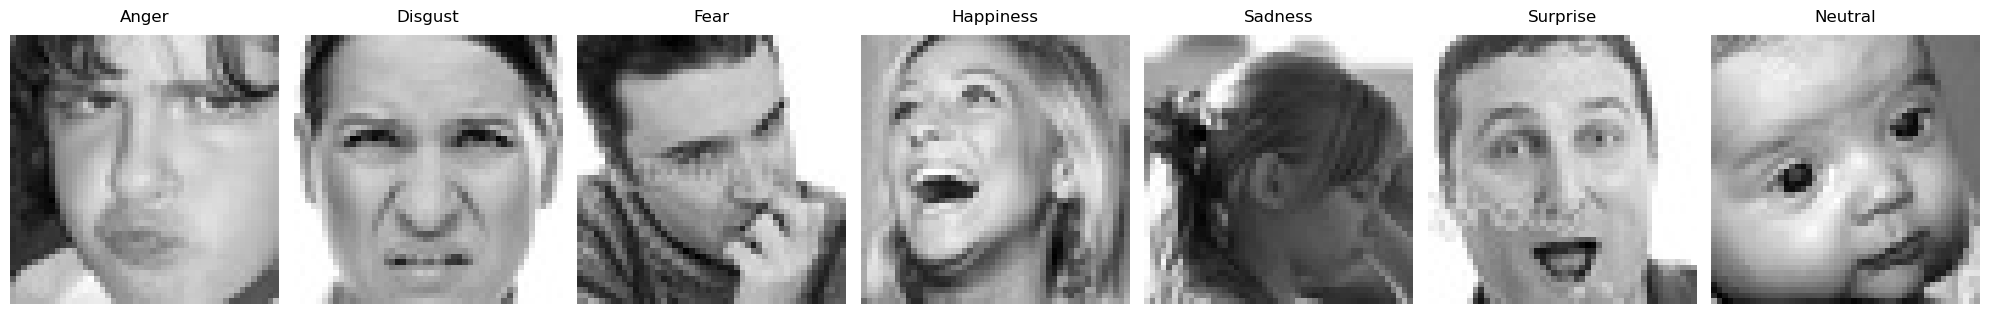

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt

pic_size = 48
base_path = "./images/train"

fig, axs = plt.subplots(1, 7, figsize=(20, 4))

for i, expression in enumerate(emotions):
    expression_folder = os.path.join(base_path, expression)
    image_files = os.listdir(expression_folder)[:10]  
    
    axs[i].set_title(expression.capitalize(), ha='center', pad=10)
    axs[i].axis("off")
    
    for image_file in image_files:
        image_path = os.path.join(expression_folder, image_file)
        
        try:
            img = Image.open(image_path).convert("L").resize((pic_size, pic_size))
            axs[i].imshow(img, cmap="gray")
        except (IOError, OSError) as e:
            print(f"Error loading image: {image_path}")
            print(e)

plt.tight_layout()
plt.show()

In [8]:
import os
from PIL import Image
import random

folder_path = "./images/test/anger"

image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

random_image_file = random.choice(image_files)

image_path = os.path.join(folder_path, random_image_file)

image = Image.open(image_path)

width, height = image.size

print("Width:", width)
print("Height:", height)

Width: 48
Height: 48


### Defining the CNN model architecture
___

Arhitektura modela za detekciju emocija sastoji se od nekoliko ključnih slojeva koji oblikuju protok informacija kroz mrežu. 
Model počinje s konvolucijskim slojevima koji hvataju lokalne obrasce u ulaznim slikama. Nakon svakog konvolucijskog sloja sledi sloj normalizacije serije (batch normalization) koji normalizuje aktivacije i pomaže u stabilizaciji treninga. ReLU aktivacija se primenjuje nakon svakog sloja kako bi se unela nelinearnost i poboljšala sposobnost modela za modeliranje složenih veza.

Konkretno, arhitektura ima četiri konvolucijska sloja, pri čemu se broj filtera postepeno povećava kako bi se bolje izdvojile karakteristike na višim nivoima. Nakon svakog konvolucijskog sloja sledi sloj normalizacije serije i ReLU aktivacija. Takođe se koristi max pooling layer kako bi se smanjile prostorne dimenzije značajnih mapa.

Nakon konvolucijskih slojeva, slede dense slojevi koji integriraju izvučene karakteristike i donose predviđanja. Model ima dva gusto povezana sloja s aktivacijom ReLU, a zatim izlazni sloj s softmax aktivacijom koji generise distribuciju verovatnoće za sedam mogućih klasa emocija.

Ova arhitektura omogućava postupno izdvajanje karakteristika i kombinovanje lokalnih obrazaca kako bi se donela konačna predviđanja o emocijama na ulaznim slikama.

##### Arhitektura CNN modela:

>  Conv -> BatchNormalization -> Activation -> Conv -> BatchNormalization -> Activation -> MaxPooling                     
>  Conv -> BatchNormalization -> Activation -> Conv -> BatchNormalization -> Activation -> MaxPooling                      
>  Conv -> BatchNormalization -> Activation -> Conv -> BatchNormalization -> Activation -> MaxPooling                      
>  Conv -> BatchNormalization -> Activation -> Conv -> BatchNormalization -> Activation -> MaxPooling                      
>  Flatten                                                                                    
>  Dense -> BN -> Activation                                          
>  Dense -> BN -> Activation                                          
>  Output layer                                          

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 128)       3328      
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 128)      512       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 48, 48, 128)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 128)       409728    
                                                                 
 batch_normalization_11 (Bat  (None, 48, 48, 128)      512       
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 48, 48, 128)      

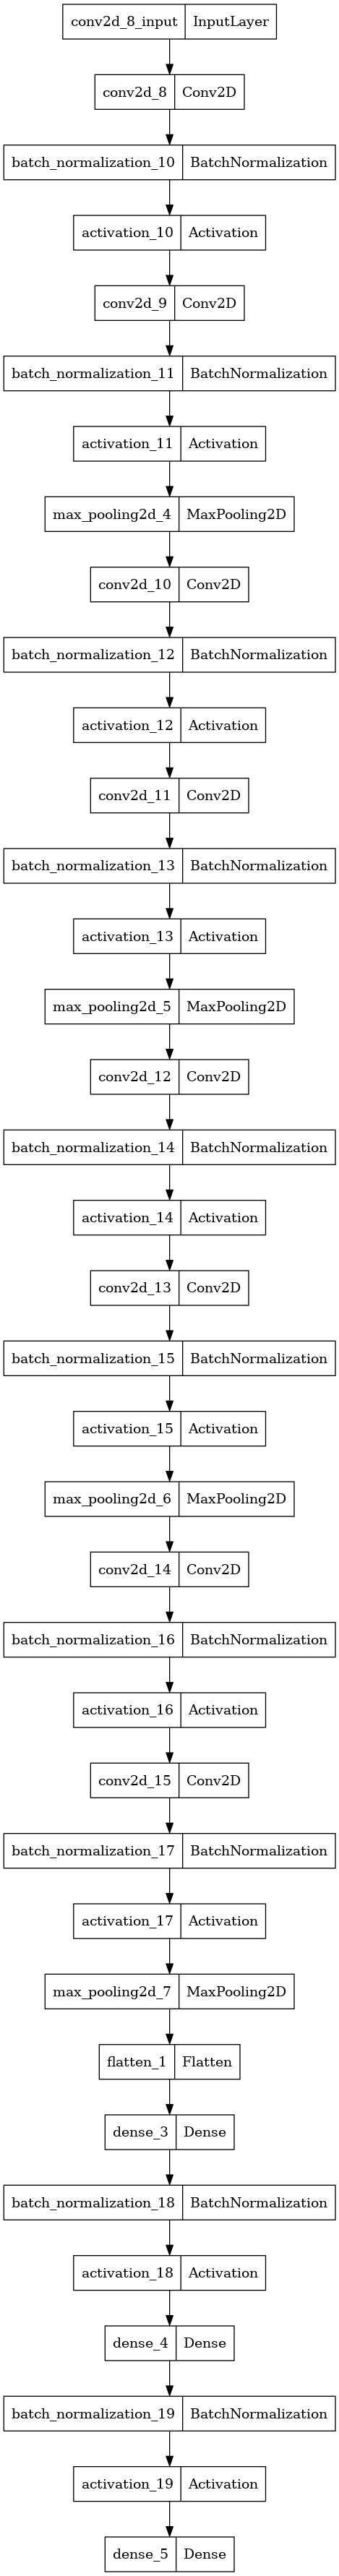

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.utils import plot_model

possible_class_predictions = 7
num_of_filters = 128
width = 48
height = 48

model = Sequential()

model.add(Conv2D(num_of_filters, (5, 5), padding='same', input_shape=(width, height, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(num_of_filters, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(2*num_of_filters, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*num_of_filters, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(4*num_of_filters, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(4*num_of_filters, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8*num_of_filters, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(8*num_of_filters, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(possible_class_predictions, activation='softmax'))

model.summary()

plot_model(model, to_file='model_graph.png', show_shapes=False, show_layer_names=True)

### Preparation of data for training and testing
---

Vrši se priprema podataka za obuku i testiranje modela koristeći ImageDataGenerator. ImageDataGenerator vrši **data augmentation** na podacima o obuci i primenjuje predobradu na podatke za testiranje.

**Data Augmentation** je tehnika koja se obično koristi u dubokom učenju za veštačko poveć́anje veličine skupa podataka za obuku i uvođenje već́e varijabilnosti u ulazne podatke. Pomaže u poboljšanju sposobnosti generalizacije modela i smanjenju preterivanja. Konkretno, primenjuju se različite transformacije na slike za obuku, kao što su rotacija, pomeranje, zumiranje i okretanje. Ove transformacije stvaraju nove verzije slika i time poveć́avaju raznovrsnost podataka o obuci.

Za podatke testiranja, primenjuje jednostavan korak predobrade skaliranjem vrednosti piksela na opseg od 0 do 1.

Sve u svemu, ovaj isečak koda kreira generatore podataka koji će obezbediti serije proširenih ili prethodno obrađenih podataka tokom procesa obuke i evaluacije, pomažući da se poboljša performansa modela i generalizacija.

---

In [21]:
train_data_directory = '/kaggle/input/emotion-images/images/train'
test_data_directory = '/kaggle/input/emotion-images/images/test'
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_directory,
    target_size=(width, height),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_directory,
    target_size=(width, height),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 28707 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Training CNN model
---

Vrši se obučavanje modela za 50 epoha koristeći learning rate scheduler i model checkpointing. 
Funkcija learning rate scheduler prilagođava brzinu učenja tokom procesa obuke. 
> Za prvih 20 epoha, viša stopa učenja od 0,001 se koristi za bržu konvergenciju. Od epohe 20 do epohe 40, stopa učenja je smanjena na 0,0001 da bi se omogućila finija podešavanja. Posle epohe 40, stopa učenja se dalje smanjuje na 0,00001 radi finog podešavanja. 

Model sa najvećom vrednošću validation accuracy čuva se tokom obuke i podaci se smeštaju u datoteku 'best_model.h5'.

Podatke za obuku, kao što je već spomenuto, obezbeđuje train_generator, a podatke za validaciju obezbeđuje test_generator. 

---

In [22]:
epochs = 50

def learning_rate_scheduler(epoch):
    if epoch < 20:
        return 0.001
    elif epoch < 40:
        return 0.0001
    else:
        return 0.00001

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[checkpoint, lr_scheduler])

Epoch 1/50
449/449 [==============================] - ETA: 0s - loss: 1.8082 - accuracy: 0.2510
Epoch 1: val_accuracy improved from -inf to 0.24728, saving model to best_model.h5
449/449 [==============================] - 79s 149ms/step - loss: 1.8082 - accuracy: 0.2510 - val_loss: 1.8140 - val_accuracy: 0.2473 - lr: 0.0010
Epoch 2/50
449/449 [==============================] - ETA: 0s - loss: 1.7503 - accuracy: 0.2800
Epoch 2: val_accuracy improved from 0.24728 to 0.28532, saving model to best_model.h5
449/449 [==============================] - 63s 140ms/step - loss: 1.7503 - accuracy: 0.2800 - val_loss: 1.8553 - val_accuracy: 0.2853 - lr: 0.0010
Epoch 3/50
449/449 [==============================] - ETA: 0s - loss: 1.6478 - accuracy: 0.3375
Epoch 3: val_accuracy did not improve from 0.28532
449/449 [==============================] - 61s 137ms/step - loss: 1.6478 - accuracy: 0.3375 - val_loss: 1.8334 - val_accuracy: 0.1871 - lr: 0.0010
Epoch 4/50
449/449 [==============================]

## Results 
---

In [23]:
import numpy as np

best_accuracy = max(history.history['val_accuracy'])
best_epoch = history.history['val_accuracy'].index(best_accuracy) + 1

print("Best Accuracy:", np.round(best_accuracy, 4) * 100,"%", "in Epoch:", best_epoch)

Best Accuracy: 69.53 % in Epoch: 45


--- 
Postignuta tačnost od 69.53% u 45. epohi predstavlja značajan rezultat. Ovi rezultati su od velike važnosti jer ukazuju na visok stepen efikasnosti i preciznosti modela koji je korišćen za analizu ekspresija i predviđanje konkretne emocije.

---

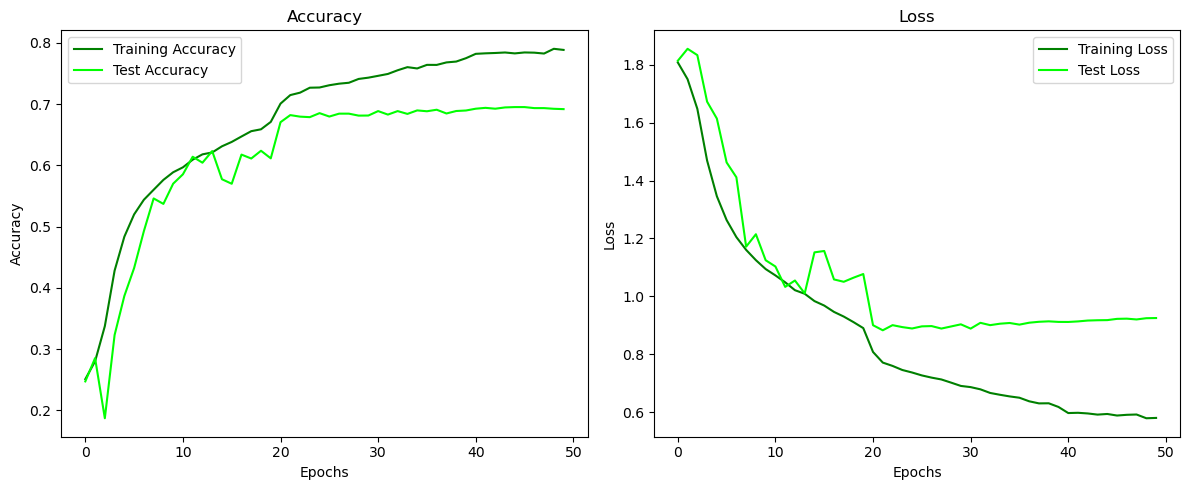

In [24]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

color_map = plt.get_cmap('Greens')
num_shades = len(train_acc)
line_colors = [color_map(i / num_shades) for i in range(num_shades)]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy', color='green')
plt.plot(test_acc, label='Test Accuracy', color='lime')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss', color='green')
plt.plot(test_loss, label='Test Loss', color='lime')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 18ms/step


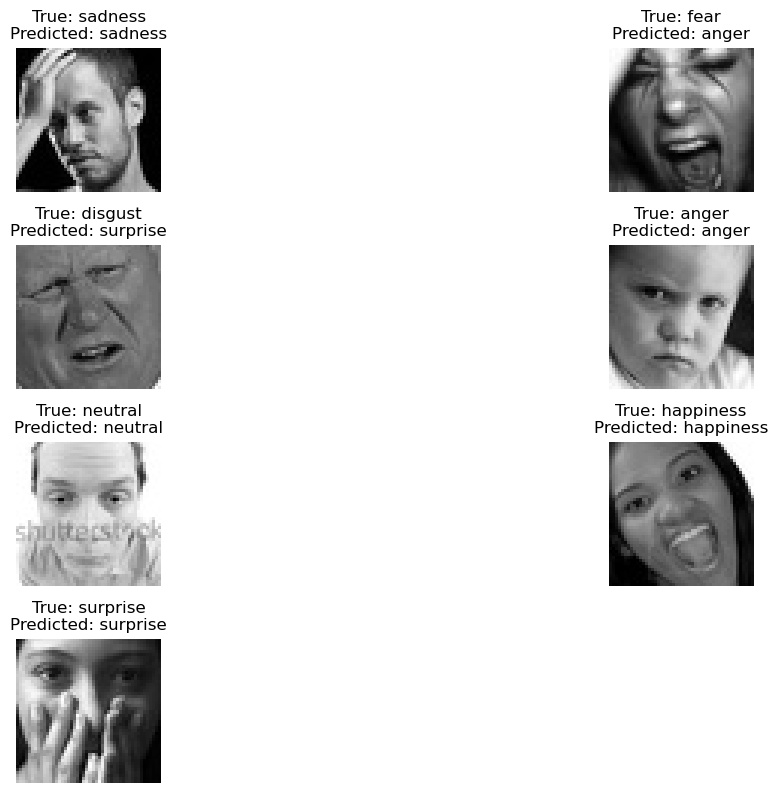

In [19]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def get_true_emotion(image_path):
    emotion_label = image_path.split('/')[-2]
    return emotion_label

def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((width, height))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

base_dir = '/kaggle/input/emotion-images/images/test'

emotion_labels = ["anger", "disgust", "fear", "happiness", "sadness", "surprise", "neutral"]

image_paths = []

for emotion in emotion_labels:
    emotion_dir = os.path.join(base_dir, emotion)
    image_files = os.listdir(emotion_dir)
    
    if len(image_files) < 1:
        continue
    
    random_image = random.choice(image_files)
    image_path = os.path.join(emotion_dir, random_image)
    image_paths.append(image_path)

num_samples = min(10, len(image_paths))
random_images = random.sample(image_paths, num_samples)

plt.figure(figsize=(12, 10))
for i, image_path in enumerate(random_images):
    image = preprocess_image(image_path)
    
    predictions = model.predict(image)
    predicted_emotion = emotion_labels[np.argmax(predictions)]
    
    true_emotion = get_true_emotion(image_path) 
    
    image = Image.open(image_path)
    plt.subplot(5, 2, i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.title(f'True: {true_emotion}\nPredicted: {predicted_emotion}')
plt.tight_layout()
plt.show()